### 批量归一化层  
作用在：  
全连接层和卷积层输出上，激活函数之前  
全连接层和卷积层输入上  
对全连接层：作用在特征维上（对每个特征上的数据进行一次归一化）  
对卷积层：作用在通道维上（对每个通道上的数据进行一次归一化） 
### 没必要和Dropout混合使用  
实际上是通过在每个小批量里加入噪音来控制模型复杂度  
### 作用  
可以加快收敛速度，但一般不改变模型精度  
允许使用更大的学习率做训练，统一前后层的训练速度

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
# 对全连接层：作用在特征维上，传入输出/输入的特征维数
# 对卷积层：作用在通道维上，传入输出/输入的通道数
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5), nn.BatchNorm2d(6),
    nn.Sigmoid(), nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.BatchNorm2d(16),
    nn.Sigmoid(), nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(), 
    nn.Linear(256, 120), nn.BatchNorm1d(120), nn.Sigmoid(), 
    nn.Linear(120, 84), nn.BatchNorm1d(84), nn.Sigmoid(), 
    nn.Linear(84, 10))

loss 0.197, train acc 0.927, test acc 0.782
35676.7 examples/sec on cuda:0


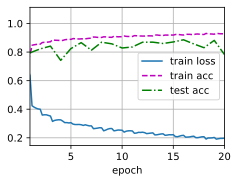

In [3]:
lr,num_epochs,batch_size = 0.9, 20, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())